In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import date
from dateutil.relativedelta import relativedelta
from datetime import datetime
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
training_dataset = pd.read_csv("/content/drive/MyDrive/training_dataset.csv")
training_dataset

,Date,Open,High,Low,Close,Adj Close,Volume,Sentiment
0,2017-10-16,10207.400391,10242.950195,10175.099609,10230.849609,10230.849609,203000,-1
1,2017-10-17,10227.650391,10251.849609,10212.599609,10234.450195,10234.450195,195700,1
2,2017-10-18,10209.400391,10236.450195,10175.750000,10210.849609,10210.849609,254200,-1
3,2017-10-19,10210.349609,10211.950195,10123.349609,10146.549805,10146.549805,30200,-1
4,2017-10-23,10176.650391,10224.150391,10124.500000,10184.849609,10184.849609,218100,1
...,...,...,...,...,...,...,...,...
1224,2022-10-06,17379.250000,17428.800781,17315.650391,17331.800781,17331.800781,265500,1
1225,2022-10-07,17287.199219,17337.349609,17216.949219,17314.650391,17314.650391,216300,1
1226,2022-10-10,17094.349609,17280.150391,17064.699219,17241.000000,17241.000000,234000,1
1227,2022-10-11,17256.050781,17261.800781,16950.300781,16983.550781,16983.550781,282600,1


In [4]:
df = training_dataset[['Open', 'Adj Close', 'Volume', 'Sentiment']]
df['Open'] = df['Open'].shift(-1)
df.drop(df.tail(1).index,inplace=True)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Open,Adj Close,Volume,Sentiment
0,10227.650391,10230.849609,203000,-1
1,10209.400391,10234.450195,195700,1
2,10210.349609,10210.849609,254200,-1
3,10176.650391,10146.549805,30200,-1
4,10218.549805,10184.849609,218100,1
...,...,...,...,...
1223,17379.250000,17274.300781,226000,1
1224,17287.199219,17331.800781,265500,1
1225,17094.349609,17314.650391,216300,1
1226,17256.050781,17241.000000,234000,1


In [23]:
X = df[['Adj Close', 'Volume', 'Sentiment']]
sc = MinMaxScaler(feature_range=(0,1))
X = sc.fit_transform(X)

y = df['Open'].values
sc2 = MinMaxScaler(feature_range=(0,1))
y = y.reshape(-1, 1)
y = sc2.fit_transform(y)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = False, stratify = None)

In [25]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (X_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Train the model
model.fit(X_train, y_train, batch_size=1, epochs=15)

Epoch 1/15
982/982 [==============================] - 7s 5ms/step - loss: 0.0047 - mean_absolute_error: 0.0403
Epoch 2/15
982/982 [==============================] - 4s 4ms/step - loss: 2.8752e-04 - mean_absolute_error: 0.0119
Epoch 3/15
982/982 [==============================] - 4s 4ms/step - loss: 3.3608e-04 - mean_absolute_error: 0.0124
Epoch 4/15
982/982 [==============================] - 4s 4ms/step - loss: 1.9681e-04 - mean_absolute_error: 0.0099
Epoch 5/15
982/982 [==============================] - 4s 5ms/step - loss: 4.0608e-04 - mean_absolute_error: 0.0144
Epoch 6/15
982/982 [==============================] - 4s 4ms/step - loss: 3.7969e-04 - mean_absolute_error: 0.0117
Epoch 7/15
982/982 [==============================] - 4s 4ms/step - loss: 2.7431e-04 - mean_absolute_error: 0.0113
Epoch 8/15
982/982 [==============================] - 4s 4ms/step - loss: 2.1567e-04 - mean_absolute_error: 0.0102
Epoch 9/15
982/982 [==============================] - 4s 4ms/step - loss: 2.2705e-04

In [26]:
y_pred = model.predict(X_test)
y_pred = sc2.inverse_transform(y_pred)
y_true = sc2.inverse_transform(y_test)

from sklearn.metrics import mean_squared_error

mean_squared_error(y_true, y_pred, squared=False)

8/8 [==============================] - 1s 4ms/step


170.85475525093634

8/8 [==============================] - 0s 4ms/step


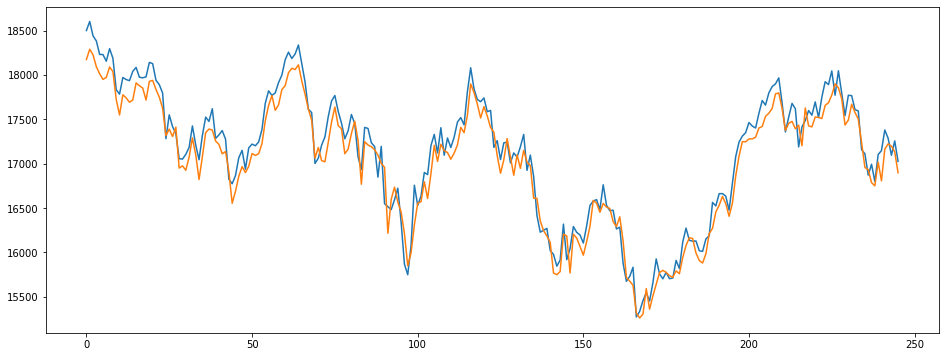

In [27]:
y_pred = model.predict(X_test)
y_pred = sc2.inverse_transform(y_pred)
y_true = sc2.inverse_transform(y_test)
# Visualize the data

plt.figure(figsize=(16,6))
plt.plot(y_true)
plt.plot(y_pred)
plt.show()

In [28]:
from sklearn.metrics import r2_score
r2_score(y_true, y_pred)

0.9454680151308099

In [29]:
open = []
for i in y_test:
  open.append(i[0])
len(open)

246

In [30]:
data = pd.DataFrame()
data['open'] = open
data['Open PCT'] = data['open'].pct_change(1) 
data.dropna(inplace=True)
data

,open,Open PCT
1,1.000000,0.009498
2,0.985051,-0.014949
3,0.979788,-0.005344
4,0.965801,-0.014276
5,0.965690,-0.000114
...,...,...
241,0.887450,0.024627
242,0.878980,-0.009545
243,0.861234,-0.020189
244,0.876114,0.017277


In [31]:
amount = 1000
new_arr1 = []
og_x = data['Open PCT'].values
for i in og_x:
  amount = amount + (amount*i)
  if i>0:
    new_arr1.append(1)
  else:
    new_arr1.append(0)
amount

863.0231567954388

In [32]:
open_predict = []
for i in y_pred:
  open_predict.append(i[0])
print(len(open_predict))

data2 = pd.DataFrame()
data2['open predict'] = open_predict
data2['Open predict PCT'] = data2['open predict'].pct_change(1) 
data2.dropna(inplace=True)
data2

246


,open predict,Open predict PCT
1,18289.427734,0.006415
2,18226.568359,-0.003437
3,18091.994141,-0.007383
4,18012.253906,-0.004407
5,17949.826172,-0.003466
...,...,...
241,17161.937500,0.021177
242,17222.720703,0.003542
243,17197.875000,-0.001443
244,17132.210938,-0.003818


In [33]:
new_arr2 = []
amount = 1000
x = data2['Open predict PCT'].values
for i in range(len(x)):
  if x[i]>0:
    amount = amount + (amount*og_x[i])
    new_arr2.append(1)
  else:
    new_arr2.append(0)
amount

4120.0210913526125

In [34]:
new_df = pd.DataFrame()
new_df['Og'] = new_arr1
new_df['pred'] = new_arr2
new_df

,Og,pred
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
240,1,1
241,0,1
242,0,0
243,1,0


In [35]:
new_df[new_df['Og'] == new_df['pred']]

,Og,pred
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
237,0,0
238,1,1
240,1,1
242,0,0
